# Import các thư viện cần thiết

In [1]:
from sklearn.tree import DecisionTreeClassifier
# https://scikit-learn.org/stable/modules/tree.html#classification
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree.export import export_text
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html#sklearn.tree.export_text
from sklearn import tree

import pandas as pd

# Lấy dữ liệu của bài toán
Đọc thêm: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

In [2]:
df = pd.read_csv('students.csv')
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [3]:
df.head()

,toeic,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,1
3,710,3.7,5,1
4,680,3.9,4,1


In [4]:
X = df[['toeic', 'gpa', 'work_experience']] # Inputs
y = df['admitted'] # Labels

# Chia bộ dữ liệu ban đầu thành 2 phần

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
#     stratify=y,
    # https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn
    random_state=0
)

In [6]:
print('y_train:', y_train.to_list())
print('y_test:', y_test.to_list())

y_train: [0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
y_test: [0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0]


In [7]:
num_pos_train = sum(y_train)
num_neg_train = len(y_train) - num_pos_train

num_pos_test = sum(y_test)
num_neg_test = len(y_test) - num_pos_test

In [8]:
print(num_pos_train, '|', num_neg_train, '|', num_pos_train/num_neg_train)
print(num_pos_test, '|', num_neg_test, '|', num_pos_test/num_neg_test)

16 | 12 | 1.3333333333333333
5 | 7 | 0.7142857142857143


# Huấn luyện mô hình

In [9]:
# Khởi tạo
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=3)
# max_depth: độ sâu tối đa của cây

# Huấn luyện
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

# Hiển thị tập luật học được

In [10]:
rules = export_text(
    decision_tree,
    feature_names=['toeic','gpa','exp']
)

print(rules)

|--- gpa <= 3.15
|   |--- class: 0
|--- gpa >  3.15
|   |--- exp <= 2.00
|   |   |--- class: 0
|   |--- exp >  2.00
|   |   |--- class: 1



##### Điểm TOEIC của một sinh viên không ảnh hưởng đến việc sinh viên đó có nhận được việc hay không. Really???

[Text(133.92000000000002, 181.2, 'X[1] <= 3.15\nentropy = 0.49\nsamples = 28\nvalue = [12, 16]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(200.88000000000002, 108.72, 'X[2] <= 2.0\nentropy = 0.111\nsamples = 17\nvalue = [1, 16]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.0\nsamples = 16\nvalue = [0, 16]')]

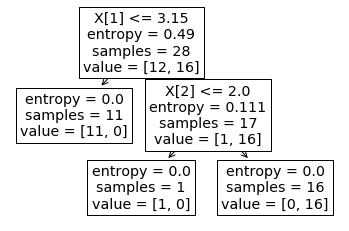

In [13]:
tree.plot_tree(decision_tree)

In [14]:
toeic = 990
gpa = 4.0
work_experience = 3

decision_tree.predict([[toeic, gpa, work_experience]])

array([1])

# Kiểm tra lại mô hình với bộ dữ liệu test

In [15]:
y_pred = decision_tree.predict(X_test)

report = metrics.classification_report(y_test,y_pred,digits=4) 

print (report)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         7
           1     1.0000    1.0000    1.0000         5

    accuracy                         1.0000        12
   macro avg     1.0000    1.0000    1.0000        12
weighted avg     1.0000    1.0000    1.0000        12



# Lưu lại mô hình
* https://stackoverflow.com/questions/10592605/save-classifier-to-disk-in-scikit-learn
* https://scikit-learn.org/stable/modules/model_persistence.html
* https://docs.python.org/3/library/pickle.html

## Giải pháp 1: Sử dụng module pickle

In [ ]:
import pickle


f = open('decision_tree_model.pkl', 'wb')
pickle.dump(decision_tree, f)
f.close

f = open('decision_tree_model.pkl', 'rb')
decision_tree = pickle.load(f)
f.close


# with open('decision_tree_model.pkl', 'wb') as f:
#     pickle.dump(decision_tree, f)

# with open('decision_tree_model.pkl', 'rb') as f:
#     decision_tree = pickle.load(f)

## Giải pháp 2: Sử dụng module joblib

In [ ]:
from sklearn.externals import joblib


joblib.dump(decision_tree, 'decision_tree_model.joblib')

decision_tree = joblib.load('decision_tree_model.joblib')